In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import umap
%matplotlib inline

In [2]:
!dir *.csv

 Volume in drive E is CODE
 Volume Serial Number is 0296-546D

 Directory of E:\

03-09-2020  19:30       111,566,446 Data_Gov_Delhi.CSV
03-09-2020  19:52        49,762,469 Data_Gov_Tamil_Nadu.CSV
03-09-2020  19:42        37,690,885 Data_Gov_Uttar_Pradesh.CSV
09-09-2020  11:07       442,531,775 nfkd_tweets_lowercase_wopunct_woemoji_wourl.csv
09-09-2020  22:58       221,976,700 nfkd_tweets_lowercase_wopunct_wostop_woemoji_wourl.csv
02-07-2020  21:15    <DIR>          sales_train_validation.csv
               5 File(s)    863,528,275 bytes
               1 Dir(s)  246,165,311,488 bytes free


In [3]:
twitter_data=pd.read_csv("nfkd_tweets_lowercase_wopunct_wostop_woemoji_wourl.csv")

In [4]:
twitter_data.head()

created_at  \
0  2020-01-22 00:14:08+00:00   
1  2020-01-22 01:05:22+00:00   
2  2020-01-22 09:10:07+00:00   
3  2020-01-22 11:19:10+00:00   
4  2020-01-22 11:26:59+00:00   

                                           full_text screen_name  \
0  rt fredros inc dear friends please spare   min...     epigiri   
1  rt mariettadaviz breaking news cdc says  us   ...    NeerajK_   
2  china issues travel advisory  deaths due  ncov...    GetNewsd   
3  rt mohfw india novel coronavirus update passen...      docvjg   
4  rt   international health regulations emergenc...    WHOSEARO   

          location                                        description  \
0  Bengaluru India  UX and product at getmarkk Food Design Startup...   
1     Mumbai India                              NationFirst             
2  New Delhi India  I am blogger and youtuber and Im express my vi...   
3  New Delhi India           Official Twitter Handle of NSUI Bilaspur   
4  New Delhi India                                         YO Beyotch   

   followers_count  friends_count  statuses_count  verified  \
0             9845           1423           36903     False   
1              847            424           57579     False   
2            18527            166           79182      True   
3             3120           3767           20597     False   
4            72008            743            8824      True   

                                   full_retweet_text  
0  Dear friends please spare a few minutes amp re...  
1  Breaking News CDC says the US now has its firs...  
2                                 No Value Mentioned  
3  Novel coronavirus update passengers from fligh...  
4  The International Health Regulations Emergency...

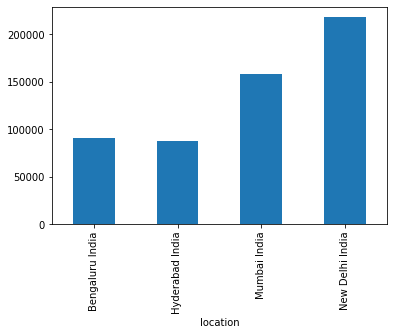

In [5]:
#tweet frequency
twitter_data.groupby("location").count()["full_retweet_text"].plot(kind="bar")

# Have to combine the full text and full_retweet_text in case to get the all the tweets

In [6]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552989 entries, 0 to 552988
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   created_at         552989 non-null  object
 1   full_text          552989 non-null  object
 2   screen_name        552989 non-null  object
 3   location           552989 non-null  object
 4   description        548413 non-null  object
 5   followers_count    552989 non-null  int64 
 6   friends_count      552989 non-null  int64 
 7   statuses_count     552989 non-null  int64 
 8   verified           552989 non-null  bool  
 9   full_retweet_text  552989 non-null  object
dtypes: bool(1), int64(3), object(6)
memory usage: 38.5+ MB


In [7]:
twitter_data.head(1)



created_at  \
0  2020-01-22 00:14:08+00:00   

                                           full_text screen_name  \
0  rt fredros inc dear friends please spare   min...     epigiri   

          location                                        description  \
0  Bengaluru India  UX and product at getmarkk Food Design Startup...   

   followers_count  friends_count  statuses_count  verified  \
0             9845           1423           36903     False   

                                   full_retweet_text  
0  Dear friends please spare a few minutes amp re...

In [8]:
twitter_data["All_tweets"]=[twitter_data.full_retweet_text[i]  if twitter_data.full_text[i].startswith("rt") else twitter_data.full_text[i] for i in range(0,len(twitter_data.created_at))]

In [29]:
twitter_data["All_tweets"].values[0]

'Dear friends please spare a few minutes amp read about the NovelCoronaVirus and the ongoing epidemic in Wuhan Chinaand now being recorded in other cities amp countries Do not spread fear Spread the right information And protect yourself and others httpstcoNsGObAwpw'

# Applying Top2vec

In [9]:
from top2vec import Top2Vec
#this works as follows we have to pass corpus consisting of documents and then our model find topic and this enhanced capabilities 
# here we are treating each tweet as each document so architecture looks like [tweet,tweet,tweet]
#In the line below its the way to train the model and this is fucking easier than CV . NLP OP
#  3 learning methods fast-learn,learn,deep-learn
#model = Top2Vec(documents=list(twitter_data["All_tweets"]), speed="deep-learn", workers=10)
#as i have trained it for 5-6 hourse by deep-learn method so we will try reloading weights by the command below
model=Top2Vec.load("twitter_top2vec")

In [27]:
 model.search_documents_by_topic(topic_num=595, num_docs=5)

(array(['Coronavirus outbreak How can you protect yourself against the virus httpstcoqUhLWVOJ',
        'How does coronavirus spread and how can you protect yourself httpstcoYuOMRRwV',
        'Coronavirus outbreak How can you protect yourself against the virus httpstcofRAHSIc',
        'How to protect yourself from coronavirus httpstcoTOMtjhlps',
        'How does coronavirus spread and how can you protect yourself httpstcodrWkAajFsJ httpstcoJGANuXgE'],
       dtype=object),
 array([0.7916222 , 0.7713865 , 0.7607444 , 0.75856984, 0.75542855],
       dtype=float32),
 array([48724, 28335, 47120, 25688, 55730], dtype=int64))

In [33]:
#model.save("twitter_top2vec")
# self.topic_vectors, self.doc_top, self.doc_dist, self.topic_sizes
print(model.doc_top[100])

3044


In [19]:
model.get_num_topics()



5993

In [15]:
number_of_tweets_in_each_topic,tweet_topics=model.get_topic_sizes()
print(tweet_topics)
print(number_of_tweets_in_each_topic)

[   0    1    2 ... 5990 5991 5992]
[3754 1719 1624 ...   17   17   16]


In [31]:
#listing first 10 topics and each topic of array has 50 topic words in it
array_of_topic_words,array_of_topic_words_scores,topic_names=model.get_topics(10)
print("Printing the Array Contain Top n topic which is 10 here. Consist of array  elements as top 50 words of that topic")
print(array_of_topic_words)
print("Printing topic relevant words scores")
print(array_of_topic_words_scores)
print("List of Corresponding topic names")

Printing the Array Contain Top n topic which is 10 here. Consist of array  elements as top 50 words of that topic
[['jo' 'apne' 'kuch' 'nahi' 'ye' 'karne' 'hoga' 'se' 'kar' 'toh' 'nhi'
  'abhi' 'rahe' 'log' 'bas' 'hua' 'rha' 'agar' 'pe' 'pata' 'hain' 'ko'
  'kiya' 'hai' 'raha' 'kya' 'sirf' 'rhe' 'na' 'mai' 'kr' 'karna' 'bana'
  'thoda' 'rahi' 'itna' 'nai' 'jaye' 'desh' 'ek' 'hota' 'ki' 'ho' 'le'
  'liye' 'kam' 'hum' 'koi' 'din' 'sath']
 ['webinar' 'stpipulse' 'session' 'omkar_raii' 'stpiideahub' 'cofounder'
  'insights' 'gaming' 'stpi' 'opportunities' 'stpiindia' 'startups'
  'register' 'esports' 'transformation' 'animation' 'founder' 'sh'
  'webinars' 'topic' 'dg' 'sridhar' 'medtech' 'speakers' 'partha'
  'series' 'innovations' 'entrepreneurs' 'saurabh' 'npc_india_gov'
  'nasscom' 'sarathi' 'leverage' 'industry' 'adoption' 'impactful'
  'digital' 'sectors' 'sanjaydhotremp' 'stpicoes' 'deliberations' 'panel'
  'insightful' 'registration' 'ceo' 'stanford' 'join' 'collaboration'
  'inter

In [33]:
#Bhai this library have 4-5 function in total and after creating embeddings we can  search the topic by keyword
topic_words,topic_word_scores,topic_scores,topic_names=model.search_topics(keywords=["Corona"], num_topics=15) 
# retures 1st gives the topic relevent to the keywords passed above ([topic,topic,topic]) topic=[list of 50 best words]
print(topic_words)
#         2nd gives score for each words in the corresponding topic
print(topic_word_scores)
#         3rd gives similarity score of each topic and keywords example topic3 and corona have 95% similarity then gives scores=0.95
print(topic_scores)
#         4th gives name of corresponding topics
print(topic_names)
#model.search_topics(keywords=["vaccine","corona"], num_topics=15)

[array(['jo', 'apne', 'kuch', 'nahi', 'ye', 'karne', 'hoga', 'se', 'kar',
       'toh', 'nhi', 'abhi', 'rahe', 'log', 'bas', 'hua', 'rha', 'agar',
       'pe', 'pata', 'hain', 'ko', 'kiya', 'hai', 'raha', 'kya', 'sirf',
       'rhe', 'na', 'mai', 'kr', 'karna', 'bana', 'thoda', 'rahi', 'itna',
       'nai', 'jaye', 'desh', 'ek', 'hota', 'ki', 'ho', 'le', 'liye',
       'kam', 'hum', 'koi', 'din', 'sath'], dtype='<U15'), array(['veeramahilas', 'pawankalyan', 'janasena', 'janaseva',
       'janasainiks', 'janasenaparty', 'garu', 'hashtag', 'selfless',
       'jspshatagniteam', 'helpless', 'involved', 'followers', 'topic',
       'word', 'leaders', 'jiin', 'anna', 'tuned', 'nellore', 'supported',
       'reddy', 'trend', 'ap', 'thank', 'kamalathal', 'hampers',
       'needful', 'political', 'thanking', 'srikakulam', 'familiar',
       'biden', 'turbulent', 'bday', 'idlis', 'telugu', 'ncbn', 'apple',
       'samant_uday', 'alert', 'deter', 'laudable', 'santosh', 'tim',
       'renuswarup',

Enter the word to search similar topics without spaces: jamat


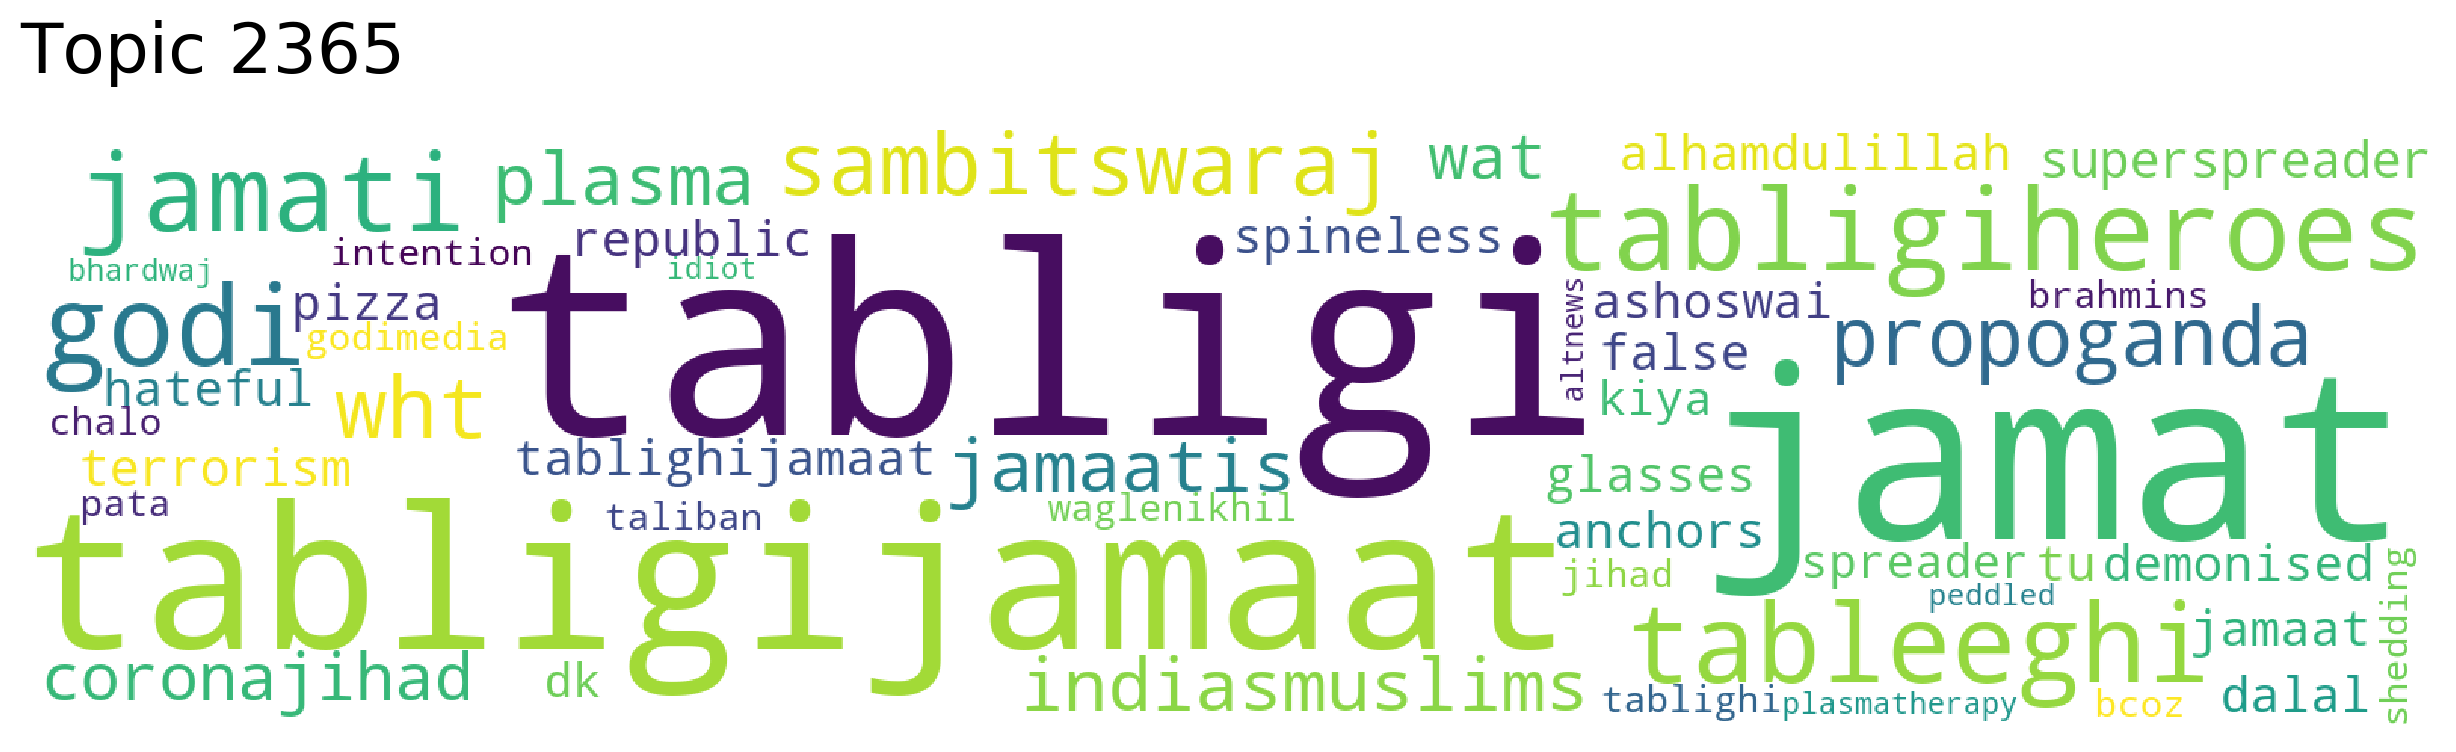

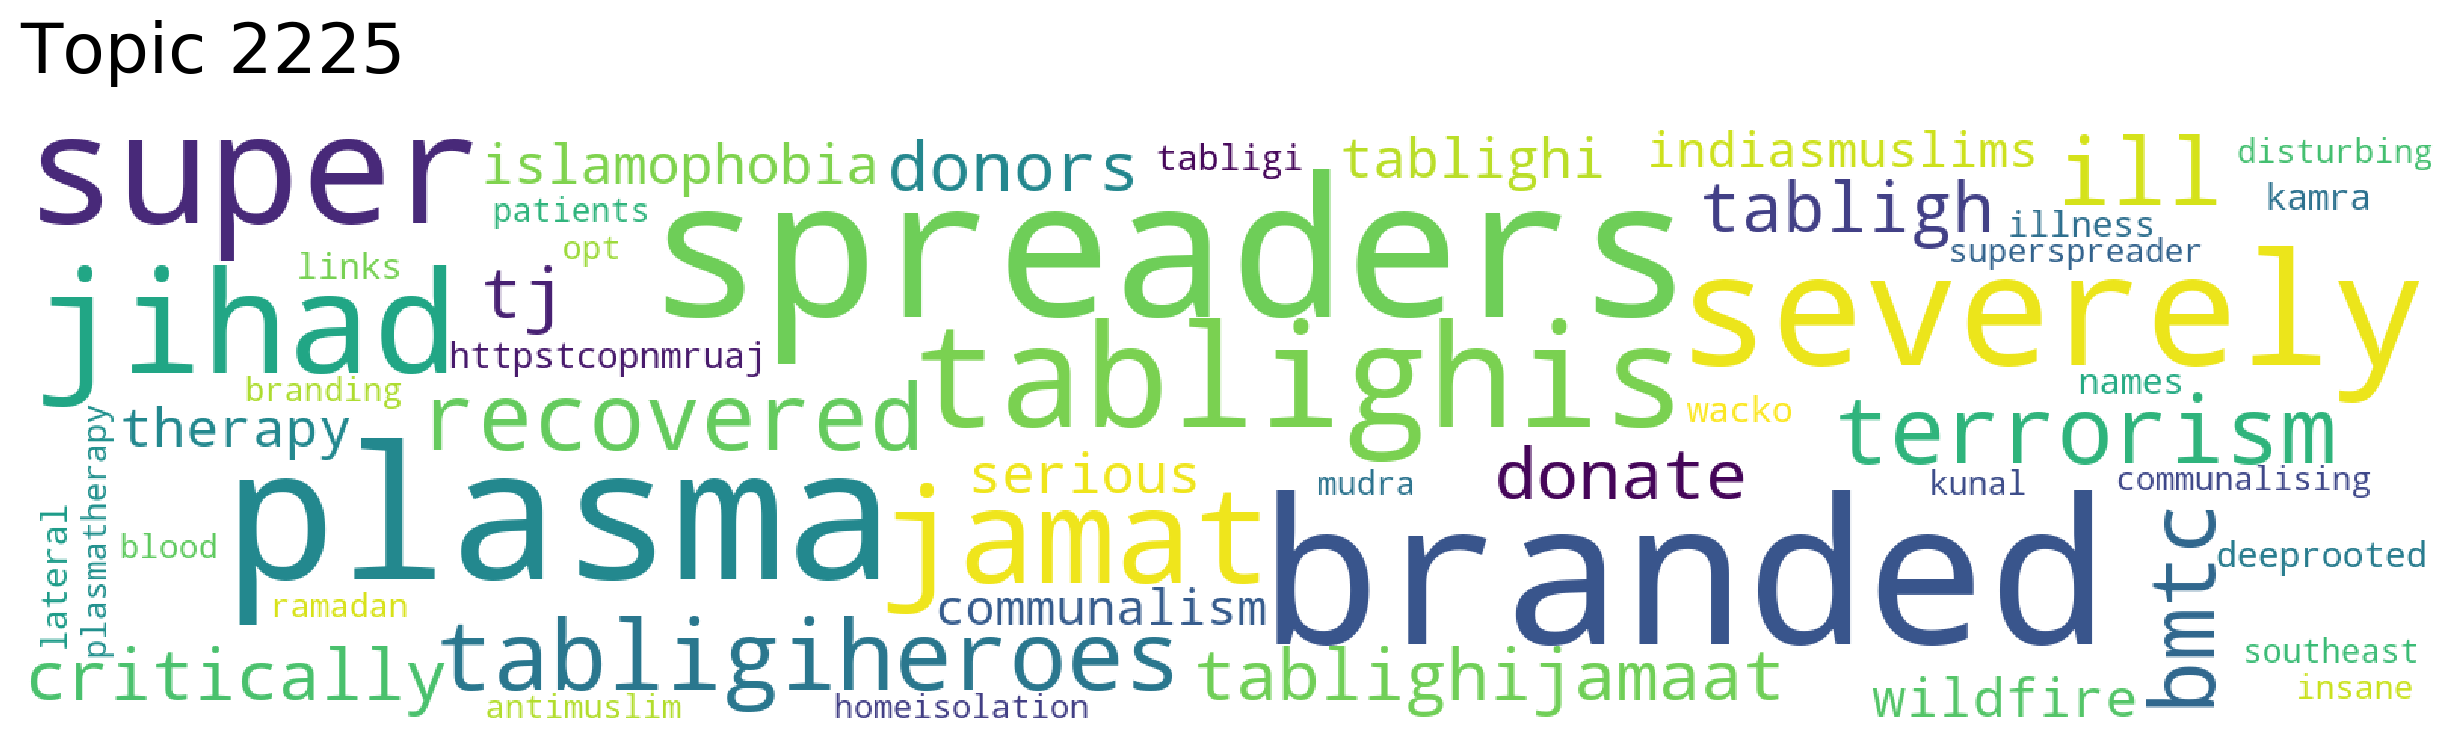

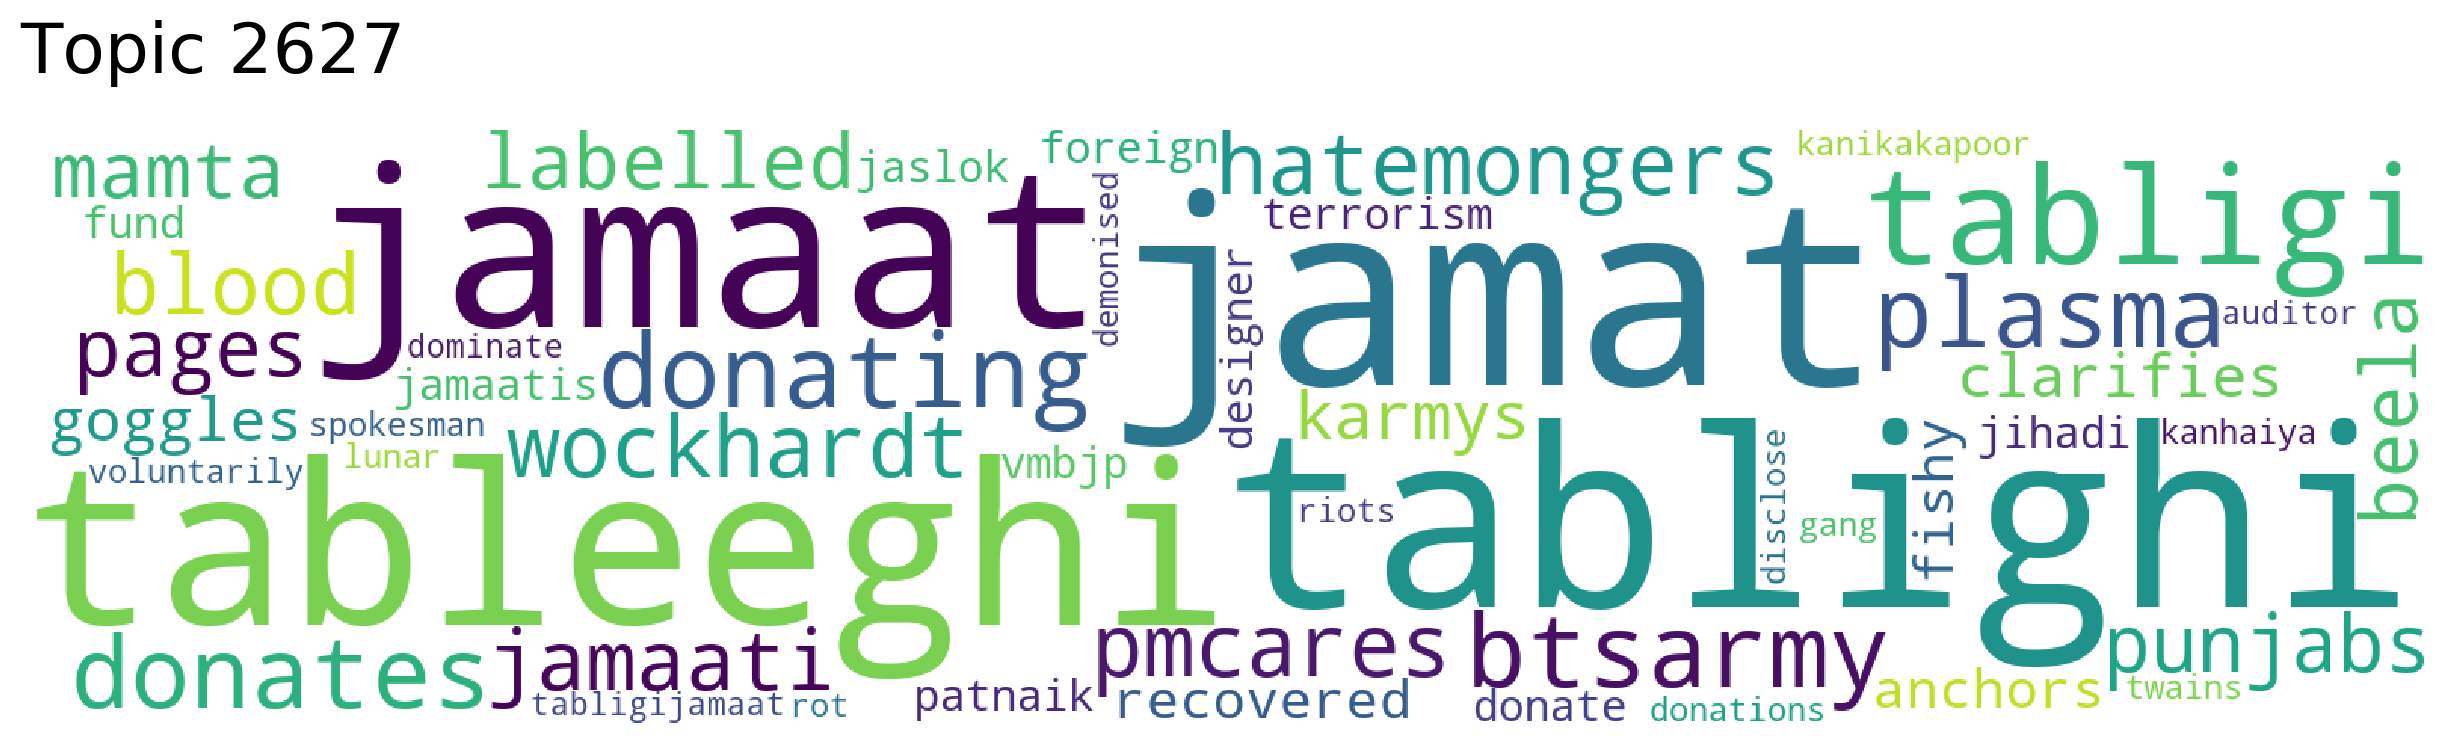

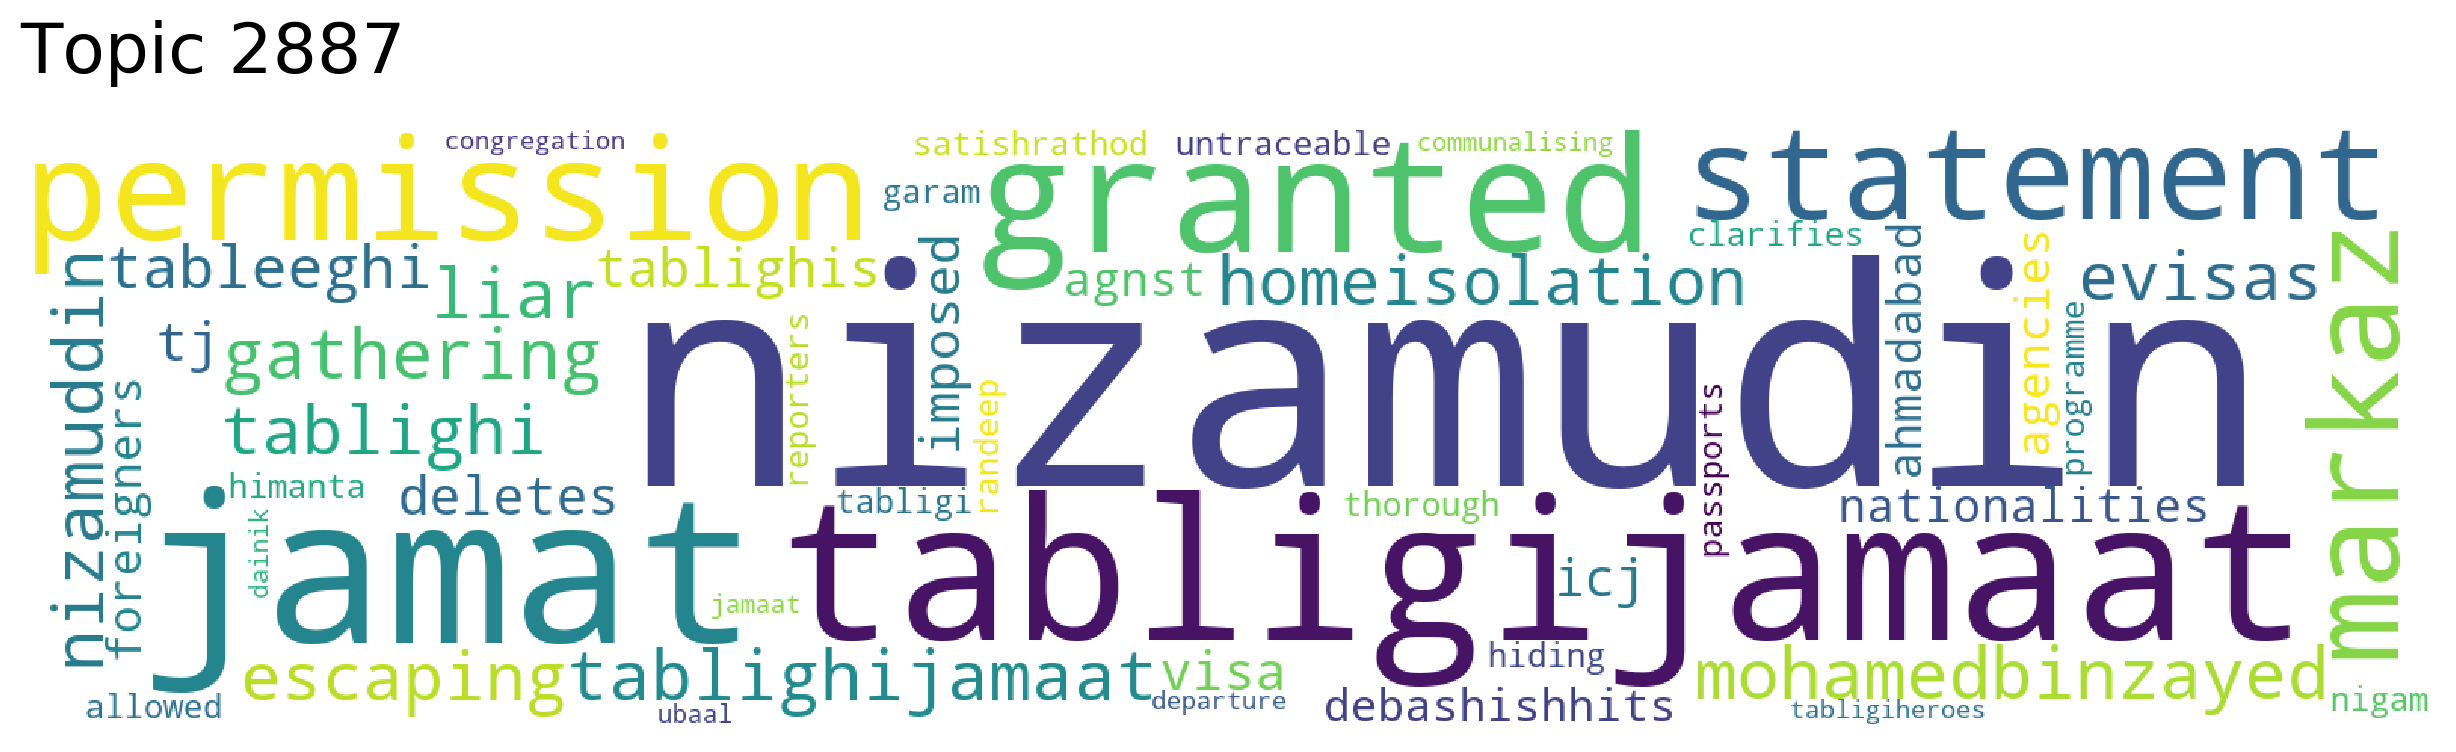

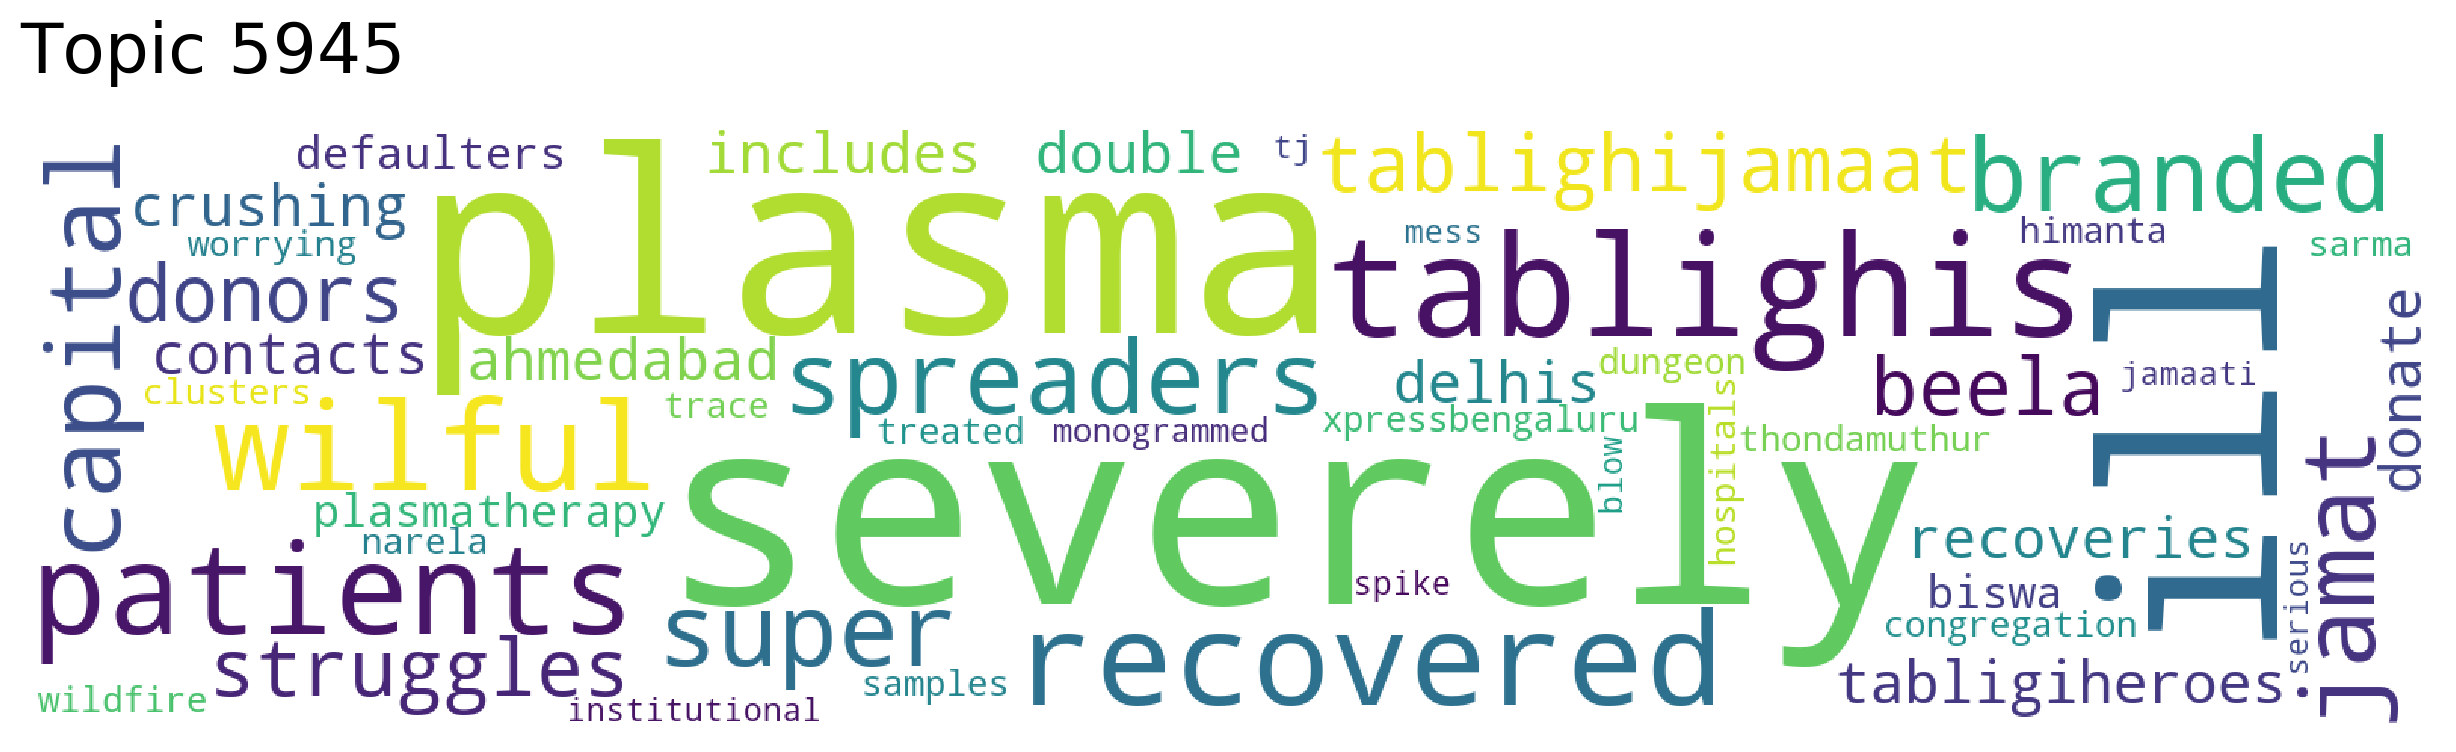

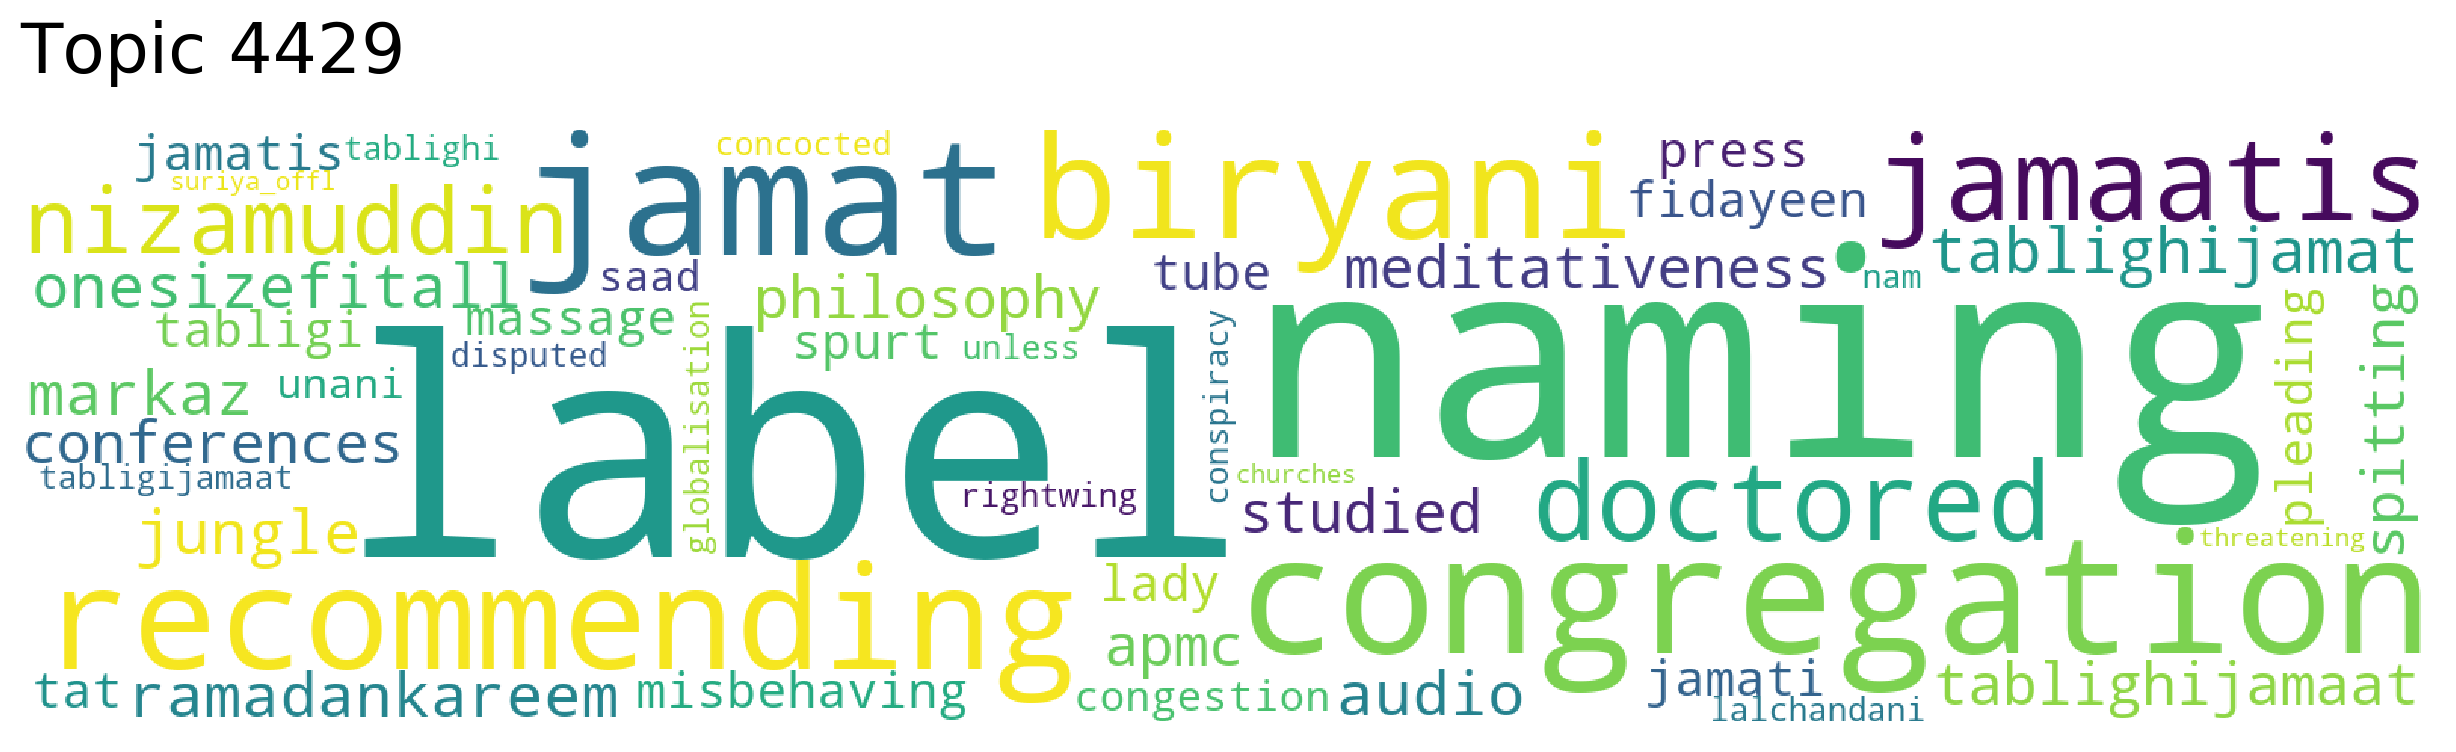

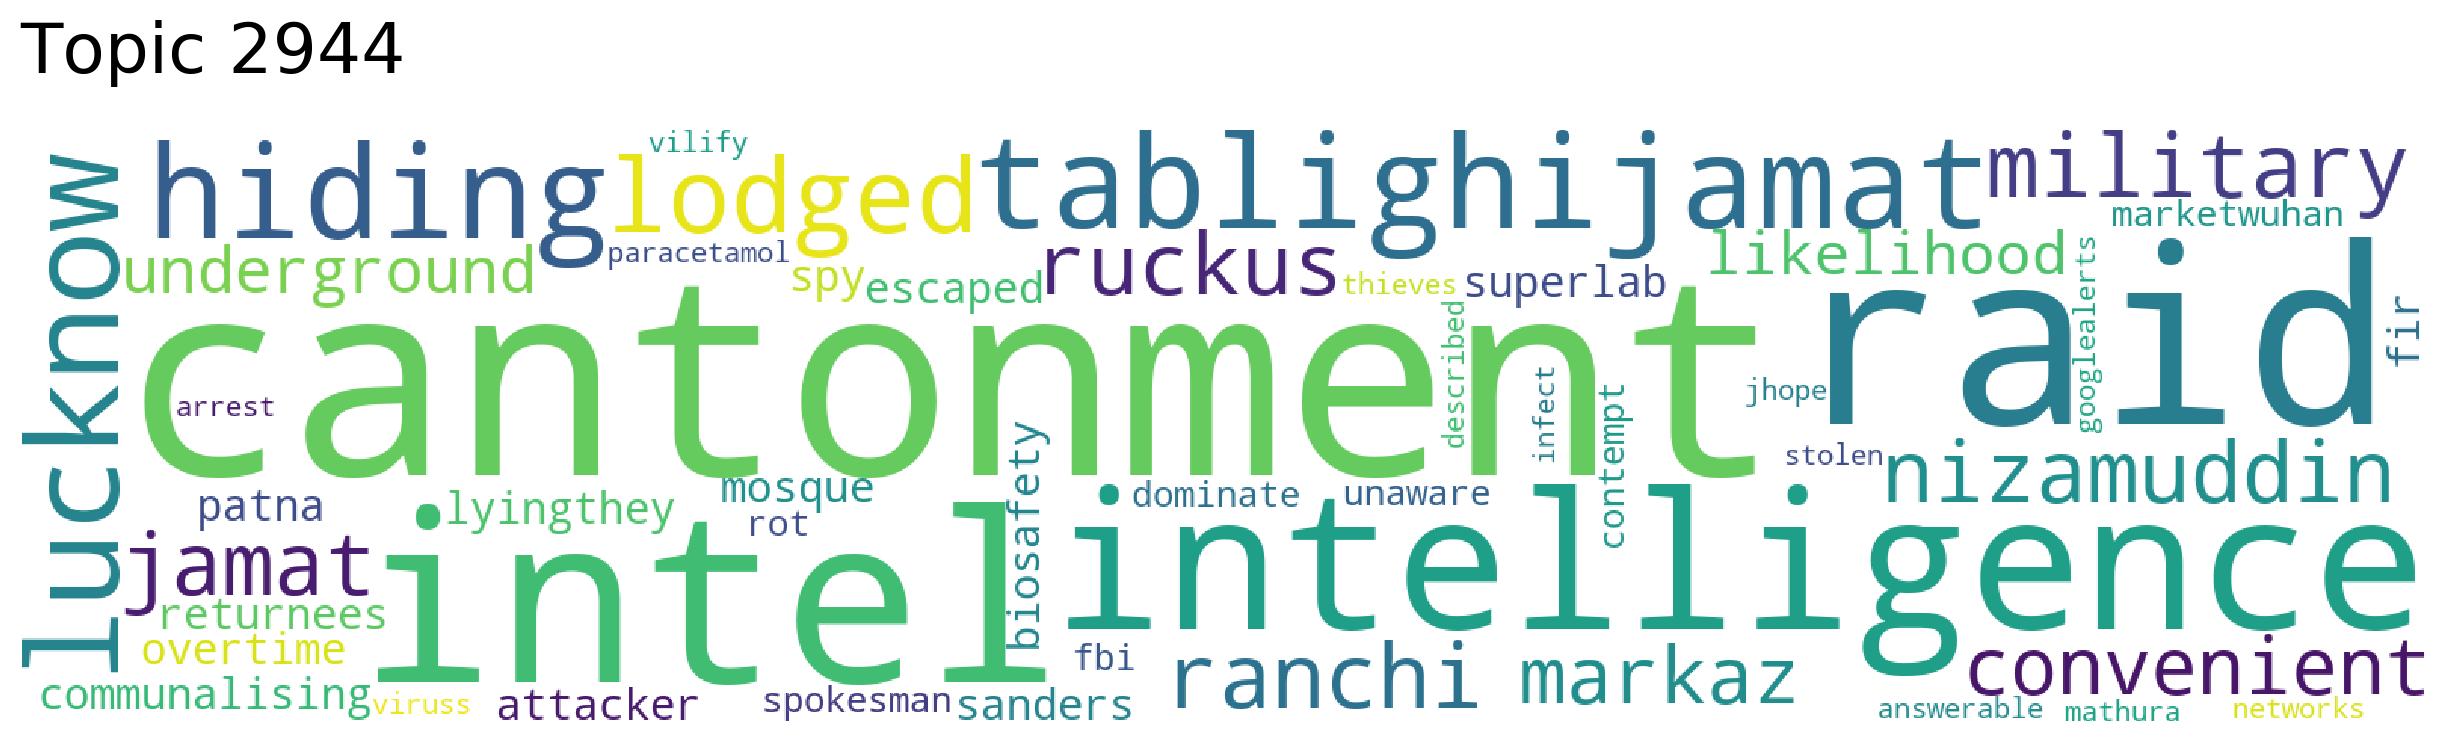

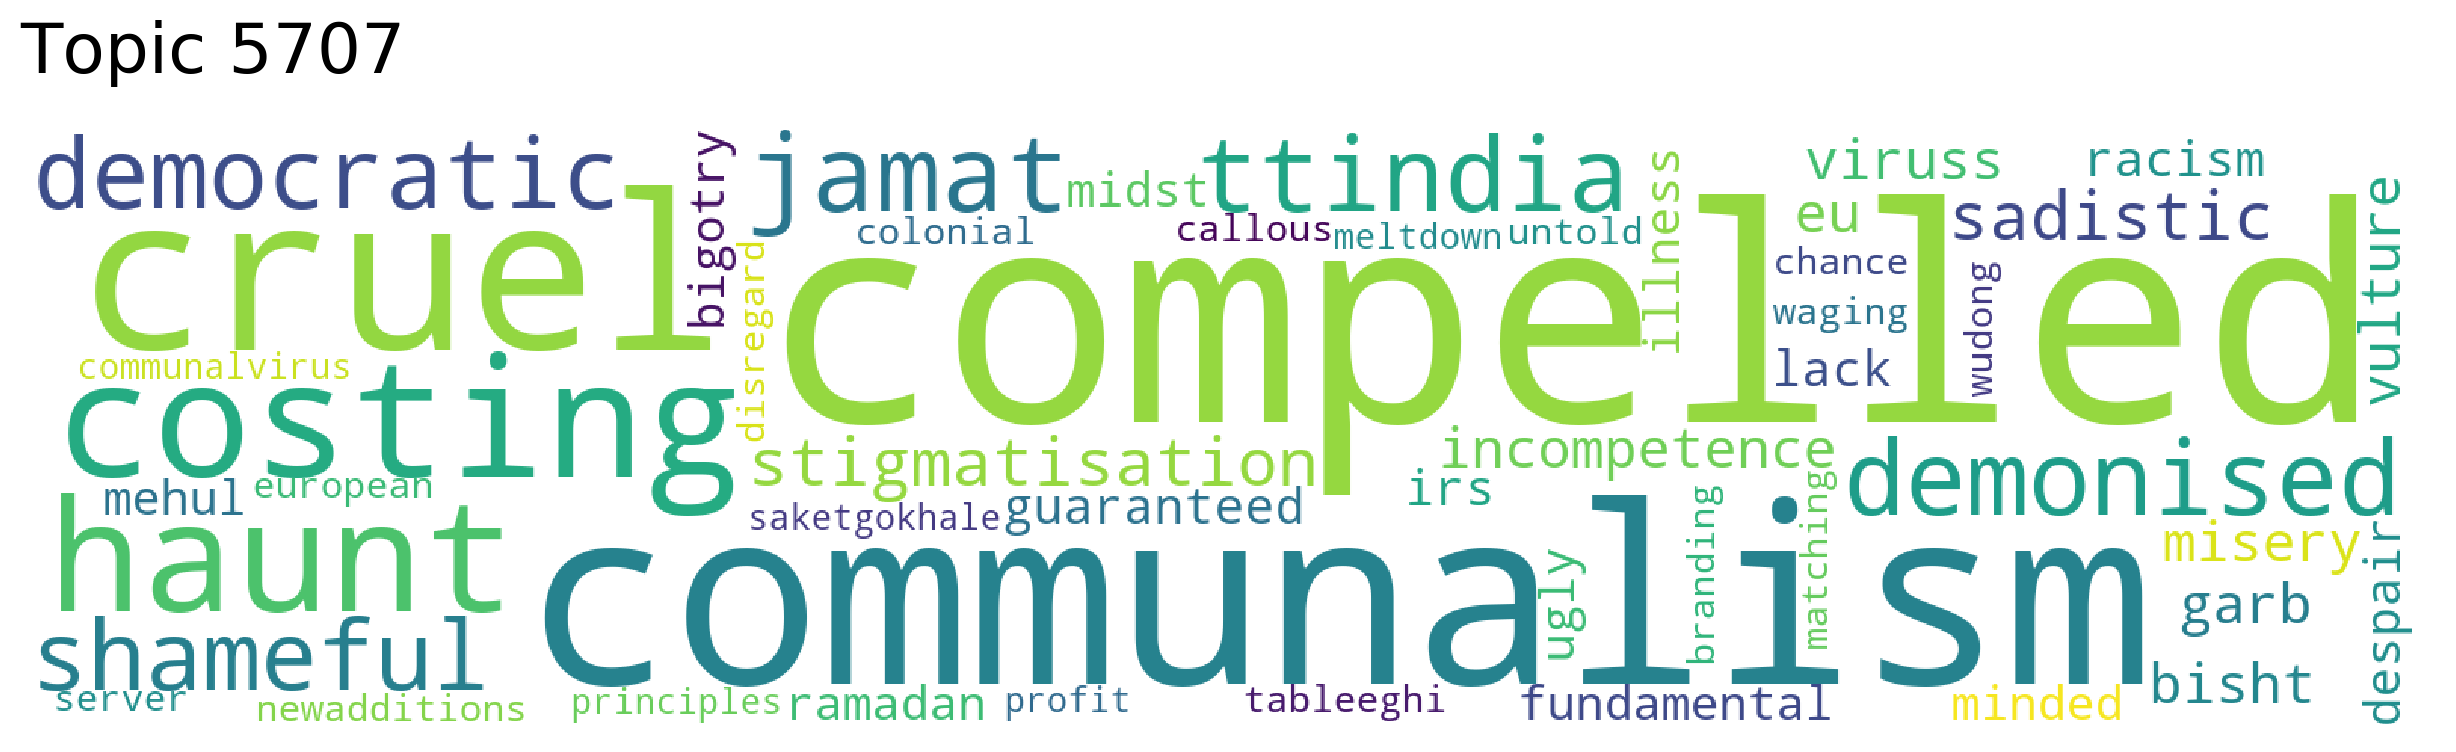

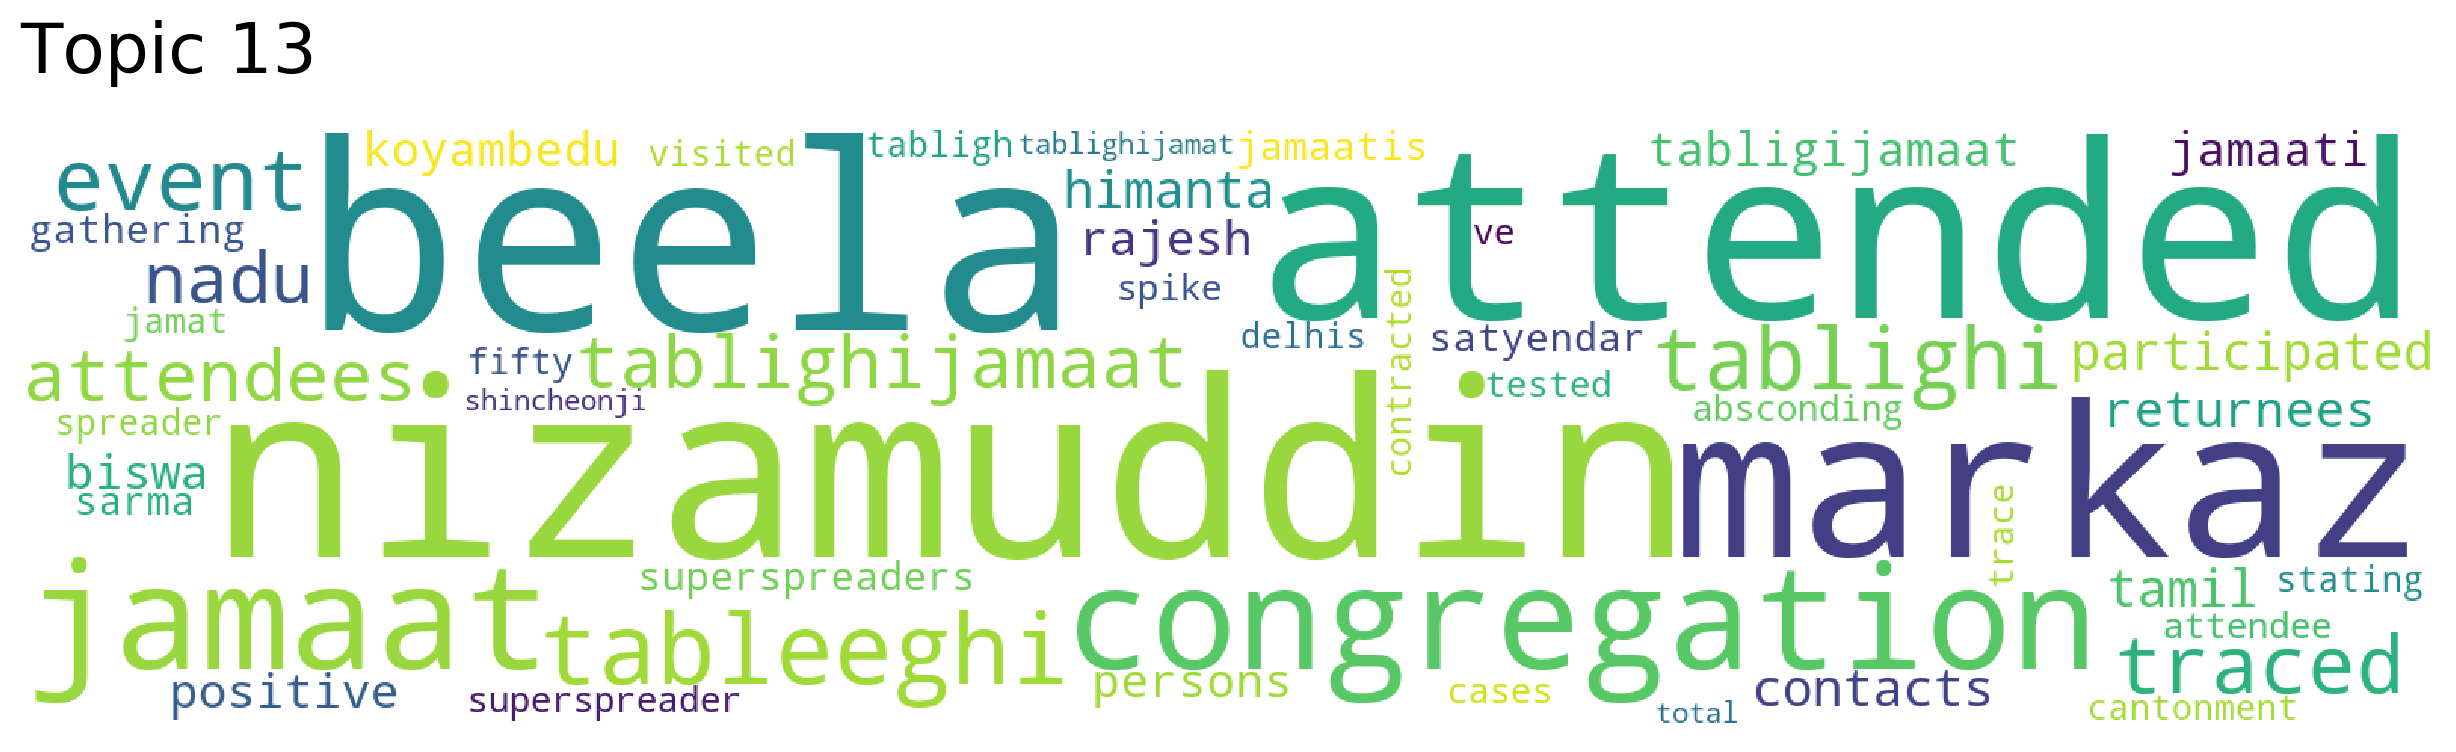

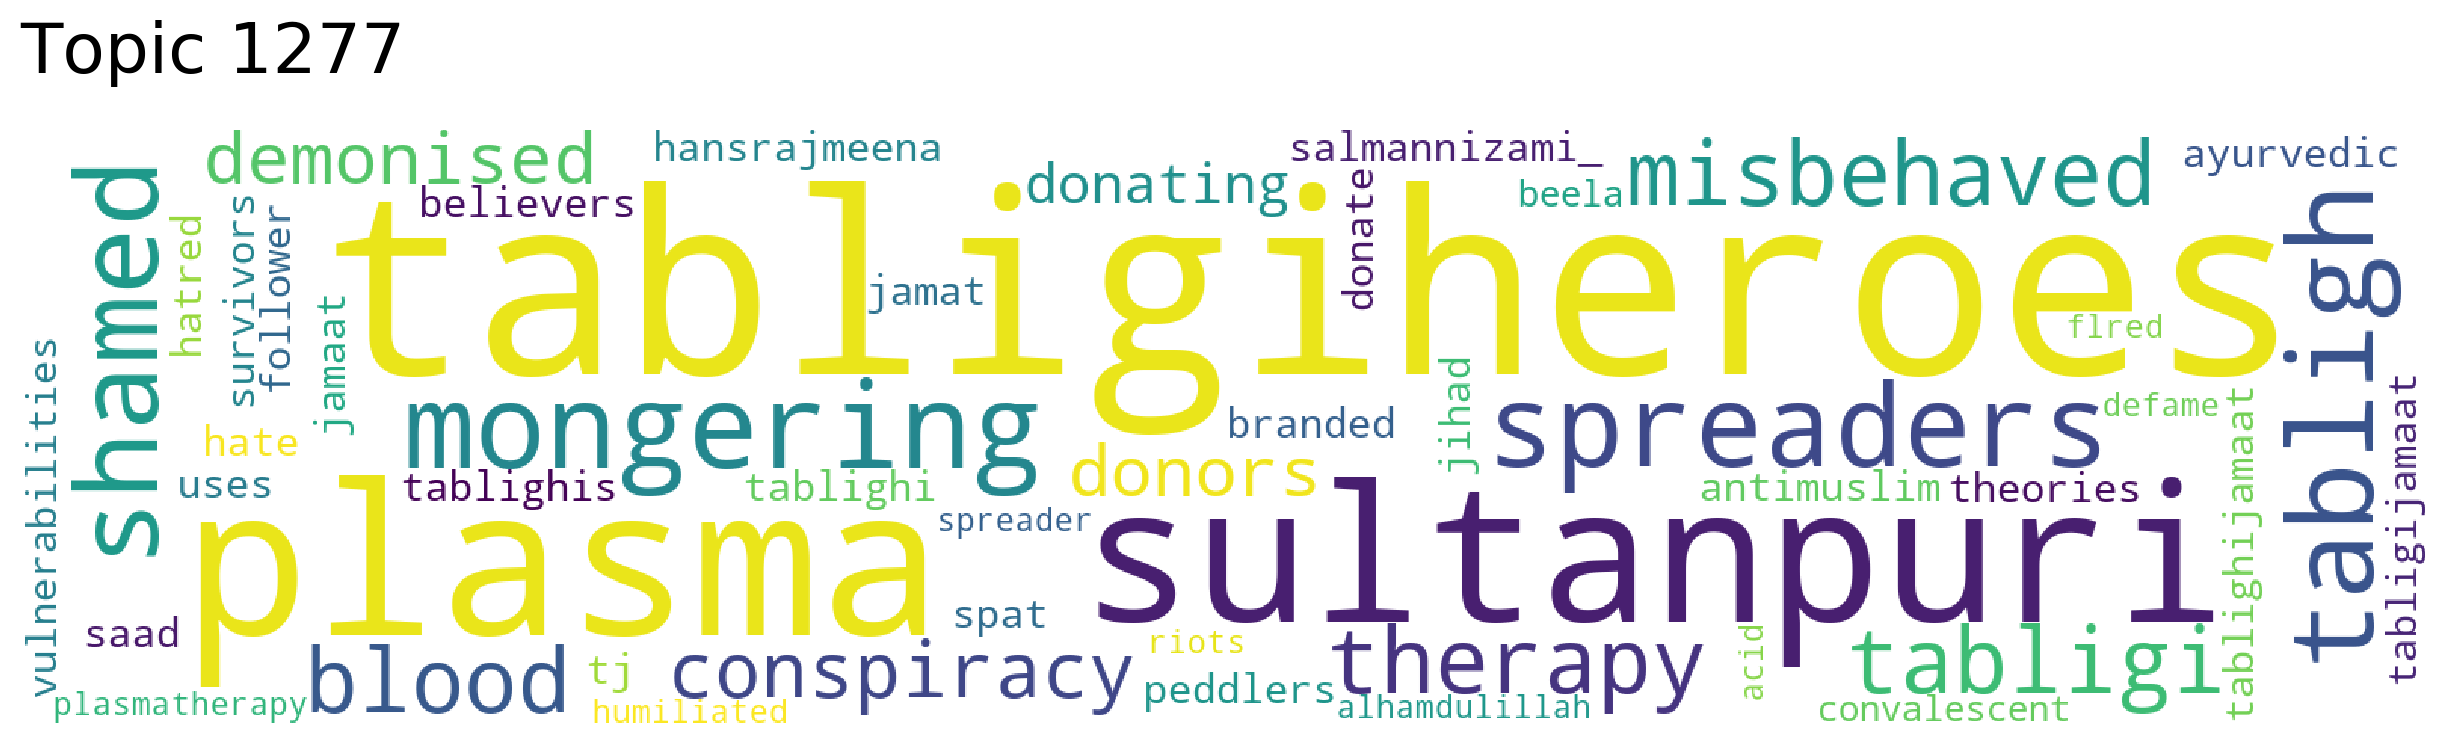

In [184]:
#Just plotted the above results in word cloud format but run the cell and then feed the input in it
key=str(input("Enter the word to search similar topics without spaces:"))
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=[key], num_topics=10)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic,background_color="white")
#3852, 2577, 5945, 2225, 4755, 3873

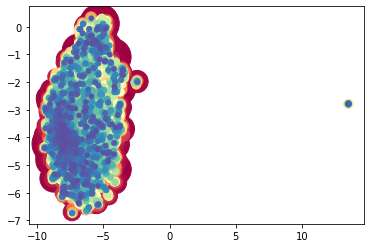

In [63]:
#see bro reading there code was fun so i also found out that we can  project topic vectors in a space and then we will try using these embedding similarity for weekly news mappings
standard_embedding = umap.UMAP(n_neighbors=15).fit_transform(model.topic_vectors)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=model.get_topic_sizes()[1], cmap='Spectral',s=model.get_topic_sizes()[0])

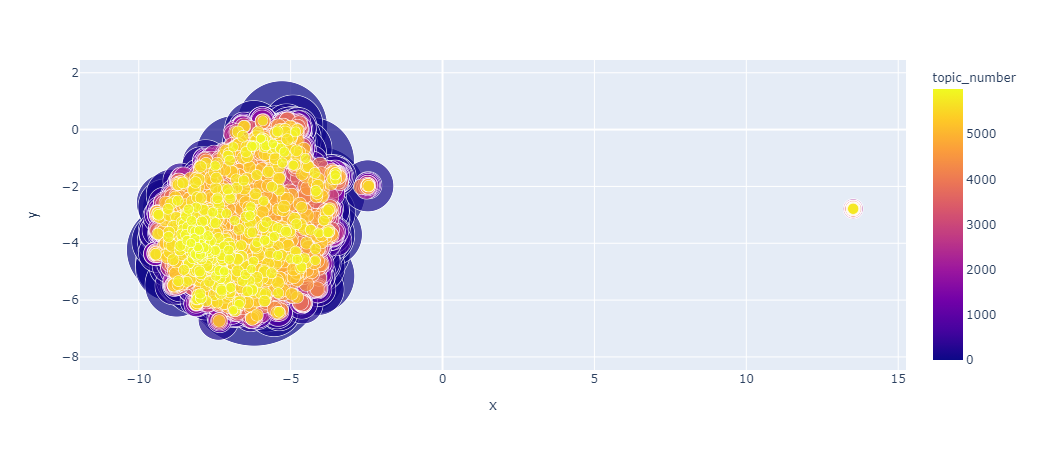

In [90]:
#This is the same above chart but with the more details 
#Bigger blob size=higher number of tweets in that topic
#color represent the topic number 
# while hovering it you will see the top 10 corresponding words of that topic
import pandas as pd
import plotly.express as px
import numpy as np
topic_words=[str(" ".join(i[:15])) for i in model.get_topics()[0]]
df =pd.DataFrame(data=np.array([standard_embedding[:, 0], standard_embedding[:, 1],model.get_topic_sizes()[0],model.get_topic_sizes()[1]]).transpose()) 
df.columns=["x","y","number_of_tweets_in_topic","topic_number"]
fig = px.scatter(df, x="x", y="y",size_max=100,size="number_of_tweets_in_topic",color="topic_number",hover_name=topic_words)
fig.show()

In [91]:
fig.write_html("topic.html")

In [147]:
#Veere here we will do semantic search the similar words to those given 2365 2225
key=str(input("Enter the word to find the similar words"))
words, word_scores = model.similar_words(keywords=[key], keywords_neg=[], num_words=50)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

Enter the word to find the similar words lockdown


to 0.7719
during 0.7687
amp 0.7492
lock 0.7445
the 0.7269
in 0.726
of 0.7217
for 0.7214
home 0.699
by 0.6954
this 0.6874
poor 0.6869
and 0.6866
amidst 0.681
covid 0.6694
pandemic 0.6691
on 0.6663
are 0.6641
people 0.6619
govt 0.659
time 0.6586
be 0.65
is 0.6498
without 0.6495
get 0.6464
even 0.6375
give 0.6371
will 0.634
one 0.6335
day 0.631
up 0.6303
due 0.6292
at 0.6258
all 0.6256
cant 0.624
with 0.6228
period 0.622
as 0.622
corona 0.6193
many 0.6187
no 0.6185
that 0.6169
their 0.6145
has 0.6126
from 0.6102
now 0.6087
like 0.6076
given 0.6058
we 0.6044
should 0.6034


In [148]:
#This is one of the function used to find the corresponding documents i.e tweets here through keywords(It removes stop words while doing so annd thats better)
documents, document_scores, document_ids = model.search_documents_by_keywords(keywords=["lockdown"], num_docs=50)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 477065, Score: 0.3213
-----------
pankajchaddah     lockdown  httpstcofuizantc
-----------

Document: 381998, Score: 0.3055
-----------
  lockdown httpstcowoamzuv
-----------

Document: 416055, Score: 0.305
-----------
sftmumbai satviksoul ada pavi  lockdown
-----------

Document: 321936, Score: 0.3004
-----------
    lockdown httpstcoazbbemok
-----------

Document: 477874, Score: 0.2926
-----------
Lockdown Lockdown Lockdown Lockdown httpstcoctJerlbbv
-----------

Document: 238605, Score: 0.2918
-----------
lockdown  jubinnautiyal httpstcomadpzpwz httpstcostixdjexag
-----------

Document: 414485, Score: 0.2917
-----------
lockdown httpstcokxrddnhx
-----------

Document: 405236, Score: 0.2833
-----------
Lockdown httpstcozTOPvSg
-----------

Document: 475287, Score: 0.2831
-----------
Lockdown CoronavirusPandemic coronavirus COVID lockdown httpstcoqQJiDhXHYX
-----------

Document: 547187, Score: 0.2827
-----------
 lockdown httpstcohfkomepo
-----------

Document: 477469, Scor

# Searching Documents by Topic
This function is used to do semantic search the documents which is tweets here 

In [145]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=0, num_docs=5)

In [149]:
model.search_documents_by_topic(topic_num=0, num_docs=5)

(array(['narendramodi dear sirjis hisaab se corona increase ho raha hai lockdown se kuchh nhi ho rha hai    mkts open kr diek ek   din chhor kar curfew q nhi lgwa sakte hai',
        'arvindkejriwal dear sirjis hisaab se corona increase ho raha hai lockdown se kuchh nhi ho rha hai    mkts open kr diek ek   din chhor kar curfew q nhi lgwa sakte hai',
        'Was waiting for this Lockdown na hota to ab tak dilli se bhi pahunch gaye hote kuch log family ka interview karne Hadddd hai httpstcoNWwvtYMM',
        'Was waiting for this Lockdown na hota to ab tak dilli se bhi pahunch gaye hote kuch log family ka interview karne Hadddd hai httpstcoNWwvtYMM',
        'anjanaomkashyap lckdown mai bhart ke logo ka sirf support tha becouse jiss terh se corona ke case mai increase hua h asa nhi lage rha ki loge lockdown ke support krte h ye lock  hmare liye h hmare docter  police hmare liye itna kr rhe fir bhi logo unki aahmiyat nhi kr rhe h'],
       dtype=object),
 array([0.7957712 , 0.75732917, 0

In [151]:
#we use this when we want to limit the number of topics these things we will not going to find in the demos they have given and also not in the yugals one i guess
m=model.hierarchical_topic_reduction(1500)

In [160]:
m

[[856,
  1781,
  5260,
  1783,
  1771,
  2183,
  1960,
  2768,
  2763,
  3481,
  3843,
  4624,
  5129,
  5333,
  5395,
  5714,
  5808,
  5987,
  0],
 [1093,
  928,
  3479,
  1943,
  3014,
  1309,
  1202,
  3755,
  2802,
  4376,
  2508,
  1852,
  4946,
  2001,
  3560,
  5246,
  5481,
  3],
 [3864,
  4002,
  2249,
  1086,
  3870,
  1972,
  1278,
  1935,
  5580,
  5319,
  2374,
  2300,
  3777,
  3271,
  3326,
  3814,
  4529,
  4606,
  4649,
  4973,
  5687,
  10],
 [1094, 1182, 3587, 1],
 [1322, 2140, 5202, 2],
 [1131, 1479, 1939, 3905, 2865, 5050, 3124, 3981, 4222, 3839, 9],
 [1725, 2595, 1641, 5959, 1904, 3896, 4956, 5310, 4],
 [954,
  3947,
  5027,
  3704,
  2668,
  5509,
  2113,
  1443,
  3471,
  3760,
  3572,
  5548,
  3279,
  5449,
  5789,
  2887,
  4740,
  3106,
  4246,
  2939,
  2393,
  2933,
  4209,
  4083,
  4453,
  4869,
  4807,
  4639,
  4977,
  5400,
  5558,
  5934,
  13],
 [922, 5],
 [2090, 3941, 3876, 5760, 5943, 6],
 [5546, 3302, 7],
 [1986, 1760, 2026, 1780, 2582, 3626, 53

In [161]:
model.get_num_topics(reduced=True)

1500

In [164]:
model.get_topics(reduced=True)[0][0]

array(['jo', 'apne', 'nahi', 'kuch', 'ye', 'se', 'hoga', 'kar', 'karne',
       'toh', 'rahe', 'abhi', 'nhi', 'bas', 'log', 'hua', 'rha', 'hain',
       'pata', 'agar', 'pe', 'hai', 'ko', 'kiya', 'ek', 'raha', 'kya',
       'na', 'sirf', 'bana', 'thoda', 'rhe', 'desh', 'hota', 'kr', 'jaye',
       'itna', 'mai', 'koi', 'rahi', 'karna', 'ki', 'kam', 'nai', 'ho',
       'hi', 'liye', 'hum', 'karte', 'din'], dtype='<U15')

In [167]:
model.similar_words(keywords=["jamat"],num_words=50,)

(array(['tabligi', 'tablighi', 'jamaat', 'nizamuddin', 'markaz',
        'tablighis', 'tablighijamat', 'tablighijamaat', 'spreaders',
        'tableeghi', 'hiding', 'spreader', 'congregation', 'tabligh',
        'nizamudin', 'maulana', 'saad', 'jihad', 'tabligiheroes',
        'muslims', 'jamati', 'mosque', 'godi', 'communalising', 'blame',
        'members', 'khanumarfa', 'lodged', 'jamaats', 'intel', 'fir',
        'raid', 'tabligijamaat', 'sudhirchaudhary', 'singlesource',
        'bigot', 'godimedia', 'tj', 'seculars', 'lucknow', 'ill',
        'foreigners', 'intentional', 'attended', 'were', 'criminal',
        'denied', 'plasma', 'islamophobia', 'tableegi'], dtype='<U15'),
 array([0.5826, 0.5678, 0.5187, 0.4932, 0.4909, 0.4891, 0.4785, 0.4711,
        0.462 , 0.4541, 0.4521, 0.4382, 0.4226, 0.4115, 0.4062, 0.3981,
        0.3941, 0.3926, 0.3923, 0.376 , 0.3748, 0.3705, 0.3631, 0.36  ,
        0.3581, 0.3554, 0.3553, 0.3539, 0.3531, 0.35  , 0.349 , 0.3476,
        0.3463, 0.345 , 

In [197]:
model.search_documents_by_documents(doc_ids=[100000],num_docs=50)

(array(['People infected with coronavirus may have no symptoms at all Thats why the virus is so hard to stop httpstcoVdAHpvbH',
        'Coronavirus symptoms Are you really infected COVID CoronavirusOutbreak httpstconULhBRrN',
        '  absolutely sure    cases  coronavirus  india seems hard  believe dont want    negative  come  seems  good   true covid coronavirusindia',
        'Truth that China is hiding It is scary caronavirusoutbreak httpstcoKFrbjvJ',
        'Tell us are you a US healthcare worker concerned about coronavirus httpstcoPwTFBYqYI',
        'well get infected  laundry workers  maha hosp refuse  wash clothes  coronavirus patients httpstcohmgercrsg',
        'thats  persistence  hard work get  read howard schultzs inspiring story   weeks byte httpstcotmeeadoj httpstcoddefrwtfo',
        ' thats  pardyyy httpstcoiendwpruem httpstcouopojfno',
        'httpstcohrggqorra rt tzack healthcare workers  china hit hard  novel coronavirus httpstcojqlketo coronavirus httpstcooeer